# 0. Введение

### Данные классификации ириса включают в себя четыре числовых признака: длину и ширину сепала, а также длину и ширину лепестка. Каждый образец ириса также относится к определенному виду, такому как Setosa, Versicolor или Virginica. Эти признаки используются для обучения модели классификации, которая пытается корректно определить вид ириса на основе их значений.

# 1. Импорт базовых библиотек

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Импорт файла с данными и их проверка

In [27]:
file_path = r'E:\Портфолио\Классификация сортов ириса с помощью KNN\iris.csv'
df = pd.read_csv(file_path)

new_columns = ["длина сепала", "ширина сепала", "длина лепестка", "ширина лепестка", "вид"]
df.columns = new_columns
df.head()

,длина сепала,ширина сепала,длина лепестка,ширина лепестка,вид
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   длина сепала     150 non-null    float64
 1   ширина сепала    150 non-null    float64
 2   длина лепестка   150 non-null    float64
 3   ширина лепестка  150 non-null    float64
 4   вид              150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [29]:
df.describe()

,длина сепала,ширина сепала,длина лепестка,ширина лепестка
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 3. Анализ данных

# 3.1 Визуализация кол-ва цветов каждого из видов

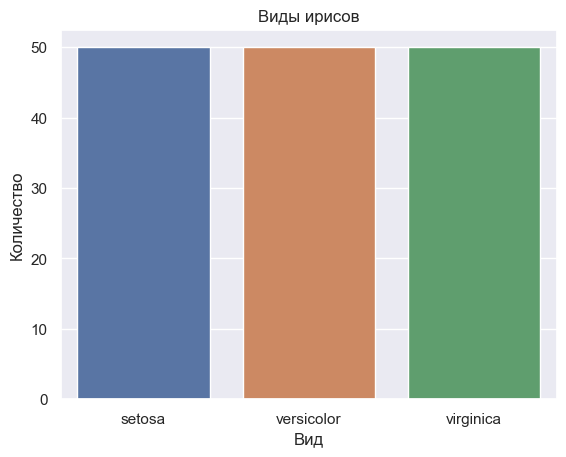

In [30]:
sns.set(style='darkgrid')
sns.countplot(data=df, x='вид') 

plt.title('Виды ирисов')
plt.xlabel('Вид')
plt.ylabel('Количество')

plt.show()

# 3.2 Как данные разделяются между друг другом?

D:\Jupyter_Notebook\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


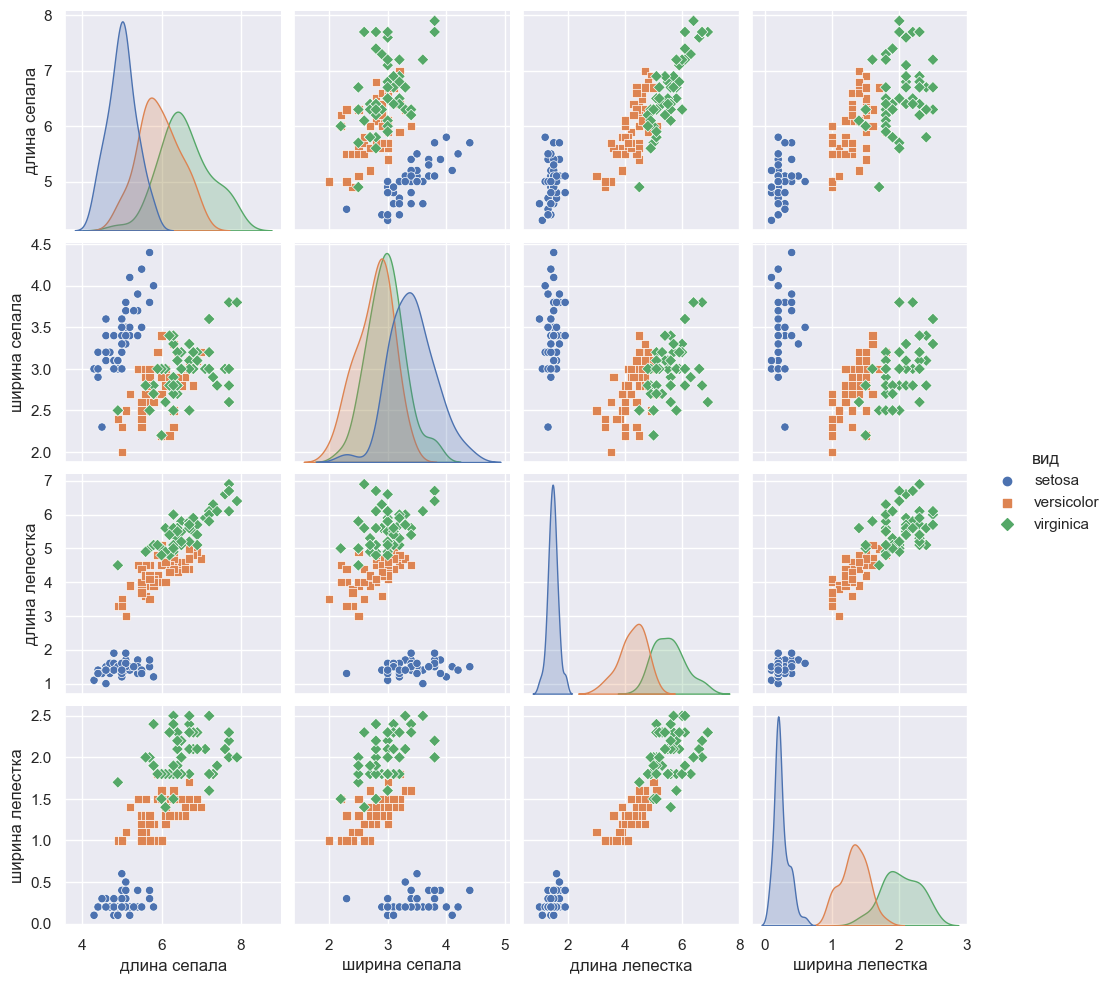

In [31]:
sns.set(style='darkgrid')
sns.pairplot(data=df, hue='вид', markers=["o", "s", "D"])
plt.show()

In [32]:
# кодирование
unique_1 = df['вид'].unique()
df['вид'] = pd.factorize(df['вид'])[0]
unique_2 = df['вид'].unique()

print(f'Уникальные данные раньше: {unique_1}')
print(f'Уникальные данные сейчас: {unique_2}')

Уникальные данные раньше: ['setosa' 'versicolor' 'virginica']
Уникальные данные сейчас: [0 1 2]


## 3.3 Анализ корреляции

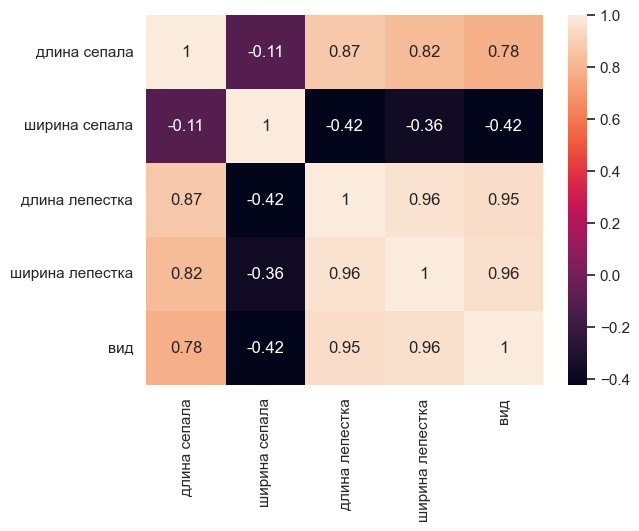

In [33]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [34]:
# корреляция с целевой переменной
corr = df.corr()['вид'].sort_values(ascending=False)
corr

вид                1.000000
ширина лепестка    0.956464
длина лепестка     0.949043
длина сепала       0.782561
ширина сепала     -0.419446
Name: вид, dtype: float64

# 4. Создание модели

## 4.1 Разделение данных

In [35]:
from sklearn.model_selection import train_test_split

X = df.drop('вид', axis=1)
y = df['вид']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## 4.2 Создание модели KNN

In [36]:
# нахождение параметров для KNN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
knn = KNeighborsClassifier()

knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [37]:
# создание конвейера для обработки и классификации данных
from sklearn.pipeline import Pipeline

operation = [('scaler', scaler), ('knn', knn)]
pipe = Pipeline(operation)

In [38]:
# обучение модели ( поиск оптимального параметра k ) 
from sklearn.model_selection import GridSearchCV

k_values = np.arange(1, 31)
param_grid = {'knn__n_neighbors': k_values}

knn_model = GridSearchCV(estimator=pipe,
                        param_grid=param_grid,
                        scoring='accuracy',
                        cv=5,
                        verbose=1)

knn_model.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])},
             scoring='accuracy', verbose=1)

In [39]:
knn_model.best_params_

{'knn__n_neighbors': 9}

# 5. Оценка модели

## 5.1 Функция для оценки модели KNN

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

def logistic_regression_metrics(model, X_test, y_test):
    
    y_pred = model.predict(X_test)

    # Точность (Accuracy)
    accuracy = round(accuracy_score(y_test, y_pred), 4)
    print(f'Accuracy: {accuracy}')

    # Precision
    precision = round(precision_score(y_test, y_pred, average='micro'), 4)
    print(f'Precision: {precision}')

    # Recall
    recall = round(recall_score(y_test, y_pred, average='micro'), 4)
    print(f'Recall: {recall}')

    # F1-score
    f1 = round(f1_score(y_test, y_pred, average='micro'), 4)
    print(f'F1-score: {f1}')
    
    # AUC
    auc_value = round(roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr'), 4)
    print(f'AUC: {auc_value}\n')

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_perc = np.round(cm / len(y_test) * 100, 2)

    print(f'Матрица ошибок:\n {cm}\n')
    print(f'Матрица ошибок в %:\n {cm_perc}\n')

    # ROC Curve
    n_classes = len(np.unique(y_test))

    # Инициализация пустого массива для хранения AUC для каждого класса
    auc_values = np.zeros(n_classes)

    plt.figure(figsize=(5, 5))
    sns.set(style='darkgrid')

    for i in range(n_classes):
        # Преобразование задачи в бинарную для каждого класса
        y_binary = (y_test == i).astype(int)

        fpr, tpr, _ = roc_curve(y_binary, model.predict_proba(X_test)[:, i])
        auc_values[i] = roc_auc_score(y_binary, model.predict_proba(X_test)[:, i])


        plt.plot(fpr, tpr, label=f'ROC-кривая класса {i} (AUC = {auc_values[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Случайное угадывание')

    plt.xlabel('Ложно положительные результаты')
    plt.ylabel('Истинно положительные результаты')
    plt.title('ROC-кривая для многоклассовой задачи')

    plt.legend(loc='lower right')
    plt.show()


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
AUC: 1.0

Матрица ошибок:
 [[13  0  0]
 [ 0 20  0]
 [ 0  0 12]]

Матрица ошибок в %:
 [[28.89  0.    0.  ]
 [ 0.   44.44  0.  ]
 [ 0.    0.   26.67]]



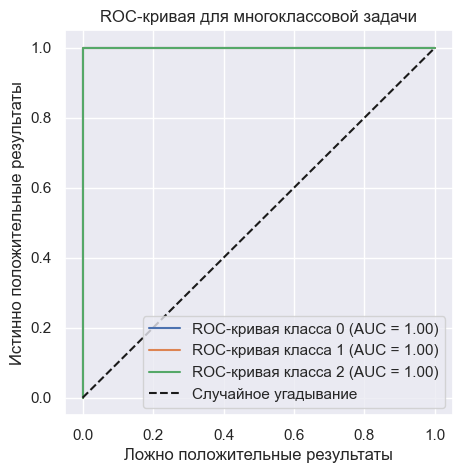

In [41]:
logistic_regression_metrics(knn_model, X_test, y_test)

# 6. Обучение модели на всём наборе данных

In [42]:
from sklearn.model_selection import GridSearchCV

k_values = np.arange(1, 31)
param_grid = {'knn__n_neighbors': k_values}

final_model = GridSearchCV(estimator=pipe,
                        param_grid=param_grid,
                        scoring='accuracy',
                        cv=5,
                        verbose=1)

final_model.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])},
             scoring='accuracy', verbose=1)

In [50]:
final_model.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier())],
 'estimator__verbose': False,
 'estimator__scaler': StandardScaler(),
 'estimator__knn': KNeighborsClassifier(),
 'estimator__scaler__copy': True,
 'estimator__scaler__with_mean': True,
 'estimator__scaler__with_std': True,
 'estimator__knn__algorithm': 'auto',
 'estimator__knn__leaf_size': 30,
 'estimator__knn__metric': 'minkowski',
 'estimator__knn__metric_params': None,
 'estimator__knn__n_jobs': None,
 'estimator__knn__n_neighbors': 5,
 'estimator__knn__p': 2,
 'estimator__knn__weights': 'uniform',
 'estimator': Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]),
 'n_jobs': None,
 'param_grid': {'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_trai

# 7. Сохранение модели

In [43]:
from joblib import dump
import os

folder_path = 'E:\\Портфолио\\Классификация сортов ириса с помощью KNN'
file_path = os.path.join(folder_path, 'iris_classif.joblib')

os.makedirs(folder_path, exist_ok=True)
dump(final_model, file_path)

print('Модель сохранена!')

Модель сохранена!


# 8. Импорт модели

In [44]:
import joblib

# Указываем путь к папке и файлу
folder_path = 'E:\\Портфолио\\Классификация сортов ириса с помощью KNN\\'
file_name = 'iris_classif.joblib'
file_path = folder_path + file_name

# Загружаем модель из файла
model = joblib.load(file_path)
print('Модель успешно импортирована!')

Модель успешно импортирована!


# 9. Использование модели

## 9.1 Функция для использования модели

In [45]:
def flower_analysis(model, data):
    
    import warnings
    
    with warnings.catch_warnings():
        data = [data]
        warnings.simplefilter("ignore")
        result = model.predict(data)[0]
        probabilities = model.predict_proba(data)
        number = round(probabilities[0].max() * 100, 2)

    if result == 0:
        print(f'Данные принадлежит к классу: setosa. Вероятность: {number}%')
    elif result == 1:
        print(f'Данные принадлежит к классу: versicolor. Вероятность: {number}%')
    else:
        print(f'Данные принадлежит к классу: virginica. Вероятность: {number}%')

## 9.2 Пример использования

In [46]:
data = []

sepal_length = float(input('Введите длину сепала: '))
data.append(sepal_length)

sepal_width = float(input('Введите ширину сепала: '))
data.append(sepal_width)

petal_length = float(input('Введите длину лепестка: '))
data.append(petal_length)

petal_width = float(input('Введите ширину лепестка: '))
data.append(petal_width)

flower_analysis(model, data)

Введите длину сепала: 5.1
Введите ширину сепала: 3.5
Введите длину лепестка: 1.4
Введите ширину лепестка: 0.2
Данные принадлежит к классу: setosa. Вероятность: 100.0%


# 10. Вывод

### Модель классификации ирисов продемонстрировала идеальные показатели во всех оценочных метриках, включая точность, полноту, F1-меру и AUC. Матрица ошибок подтвердила отсутствие неправильных предсказаний: все образцы были классифицированы верно. Это свидетельствует о высоком качестве модели и ее способности точно разделять различные классы ирисов.